# **Proyecto** - **Spotify**

* Junio  20°, 2025

> Gutiérrez Ramírez Alana Sofía

> Reyes Maldonado Oscar Romario

> Sánchez García Miguel Alexander

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Líbrerias**

**Descripción**: Esta celda importa las principales librerías y módulos necesarios para el análisis, visualización, preprocesamiento y modelado de datos.

In [ ]:
# Importar librerías para análisis y manipulación de datos
import pandas as pd  # Para manejar estructuras de datos como DataFrames
import numpy as np   # Para operaciones matemáticas y manejo eficiente de arrays

# Librerías para visualización de datos
import matplotlib.pyplot as plt  # Visualización básica: gráficos de líneas, barras, etc.
import seaborn as sns            # Visualización estadística avanzada y estilizada

# Librerías y funciones para machine learning y procesamiento de datos
from sklearn.preprocessing import StandardScaler  # Escalado/normalización de variables
from sklearn.cluster import KMeans # Algoritmo de agrupamiento K-Means
from sklearn.decomposition import PCA # Reducción de dimensiones (PCA)
from sklearn.ensemble import RandomForestClassifier  # Clasificador Bosque Aleatorio
from imblearn.under_sampling import RandomUnderSampler  # Submuestreo para balancear clases
from sklearn.model_selection import train_test_split, cross_val_score  # División de datos y validación cruzada
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix  # Métricas de clasificación
from imblearn.over_sampling import SMOTE # Sobremuestreo para balancear clases
from sklearn.ensemble import RandomForestRegressor  # Modelo de regresión Bosque Aleatorio
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Métricas para regresión

## **Carga del conjunto de Datos**

> Enlace de descarga: https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks

 **Descripción**: Esta celda carga el conjunto de datos "spotify_data.csv" desde Google Drive y realiza una exploración inicial mostrando las primeras 5 filas del conjunto.

In [ ]:
# Carga del conjunto de datos mediante pandas
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spotify_data.csv")
# Visualización del conjunto de datos (primeros 5 registros del conjunto de datos)
datos.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


**Descripción**: Esta celda tiene como objetivo **traducir los nombres de las columnas** del conjunto de datos del inglés al español.
Se define un diccionario `traducciones` que contiene como claves los nombres originales en inglés y como valores sus equivalentes en español. Posteriormente, se aplica `rename` con el argumento `inplace=True` para modificar directamente el DataFrame original.


In [ ]:
# Diccionario de traducciones de nombres de columnas del inglés al español
traducciones = {
    'Unnamed: 0': 'indice',
    'artist_name': 'nombre_artista',
    'track_name': 'nombre_cancion',
    'track_id': 'id_cancion',
    'popularity': 'popularidad',
    'year': 'año',
    'genre': 'genero',
    'danceability': 'bailabilidad',
    'energy': 'energia',
    'key': 'tonalidad',
    'loudness': 'volumen',
    'mode': 'modo',
    'speechiness': 'palabridad',
    'acousticness': 'acustica',
    'instrumentalness': 'instrumentalidad',
    'liveness': 'vitalidad',
    'valence': 'positividad',
    'tempo': 'tempo',
    'duration_ms': 'duracion_ms',
    'time_signature': 'compas'
}

# Renombrar las columnas del conjunto usando el diccionario anterior
datos.rename(columns=traducciones, inplace=True)

## **Análisis Exploratorio de Datos**

**Descripción**: En esta celda se identifican todos los géneros musicales únicos presentes en el conjunto de datos y se cuenta cuántas veces aparece cada uno. Para ello, se utiliza `np.unique` con el argumento `return_counts=True`, que devuelve tanto los valores únicos de la columna `genero` como su frecuencia. Luego, se imprime:

- El número total de géneros diferentes.
- Una lista con cada género y la cantidad de veces que aparece en el DataFrame.

In [ ]:
# Obtener los valores únicos de la columna 'genero' y cuántas veces aparece cada uno
generos, conteo = np.unique(datos["genero"], return_counts=True)

# Imprimir el número total de géneros únicos encontrados en el DataFrame
print("Número de géneros:", len(generos))

# Imprimir una lista con tuplas de género y su respectiva cantidad de apariciones
print(list(zip(generos, conteo)))

Número de géneros: 82
[('acoustic', np.int64(21097)), ('afrobeat', np.int64(12395)), ('alt-rock', np.int64(20918)), ('ambient', np.int64(21389)), ('black-metal', np.int64(21852)), ('blues', np.int64(19682)), ('breakbeat', np.int64(12256)), ('cantopop', np.int64(15773)), ('chicago-house', np.int64(5170)), ('chill', np.int64(18906)), ('classical', np.int64(18259)), ('club', np.int64(14678)), ('comedy', np.int64(19334)), ('country', np.int64(17883)), ('dance', np.int64(17212)), ('dancehall', np.int64(18788)), ('death-metal', np.int64(18038)), ('deep-house', np.int64(17896)), ('detroit-techno', np.int64(3920)), ('disco', np.int64(16987)), ('drum-and-bass', np.int64(14591)), ('dub', np.int64(18785)), ('dubstep', np.int64(4774)), ('edm', np.int64(10671)), ('electro', np.int64(11406)), ('electronic', np.int64(9369)), ('emo', np.int64(20845)), ('folk', np.int64(16170)), ('forro', np.int64(19379)), ('french', np.int64(18519)), ('funk', np.int64(15136)), ('garage', np.int64(17123)), ('german', n

**Descripción**: Esta celda muestra las dimensiones (filas y columnas) del conjunto de datos.

In [ ]:
# Dimensiones del conjunto de datos
print(f"Dimensiones del conjunto de datos: {datos.shape}")

Dimensiones del conjunto de datos: (1159764, 20)


**Descripción**: Esta celda muestra el nombre de cada columna, cantidad de valores nulos, tipos de datos presentes en las columnas, así como la cantidad de registros presentes en el conjunto de datos.

In [ ]:
# Información del conjunto de datos (tipos de datos, valores nulos, etc.)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   indice            1159764 non-null  int64  
 1   nombre_artista    1159749 non-null  object 
 2   nombre_cancion    1159763 non-null  object 
 3   id_cancion        1159764 non-null  object 
 4   popularidad       1159764 non-null  int64  
 5   año               1159764 non-null  int64  
 6   genero            1159764 non-null  object 
 7   bailabilidad      1159764 non-null  float64
 8   energia           1159764 non-null  float64
 9   tonalidad         1159764 non-null  int64  
 10  volumen           1159764 non-null  float64
 11  modo              1159764 non-null  int64  
 12  palabridad        1159764 non-null  float64
 13  acustica          1159764 non-null  float64
 14  instrumentalidad  1159764 non-null  float64
 15  vitalidad         1159764 non-null  float64
 16  

**Descripción**: Esta celda utiliza el método `describe` de pandas para obtener las estadísticas descriptivas de cada columna numérica.

In [ ]:
# Estadísticas descriptivas del conjunto de datos (media, desviación estándar, etc.)
datos.describe()

,indice,popularidad,año,bailabilidad,energia,tonalidad,volumen,modo,palabridad,acustica,instrumentalidad,vitalidad,positividad,tempo,duracion_ms,compas
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


**Descripción**: Esta celda calcula la cantidad de valores nulos por columna en el DataFrame `datos`, ordenando los resultados de mayor a menor para identificar fácilmente las columnas con más datos faltantes.

In [ ]:
# Valores nulos en el conjunto de datos
print("Valores nulos en el conjunto de datos:")
# Conteo de valores nulos
datos.isnull().sum().sort_values(ascending=False)

Valores nulos en el conjunto de datos:


,0
nombre_artista,15
nombre_cancion,1
indice,0
id_cancion,0
popularidad,0
año,0
genero,0
bailabilidad,0
energia,0
tonalidad,0


**Descripción**: Esta celda visualiza la distribución de 11 variables numéricas del conjunto de datos mediante histogramas. Utiliza subgráficas organizadas en una cuadrícula de 4x3. Se eliminan los ejes sobrantes y se agrega un título general a la figura.


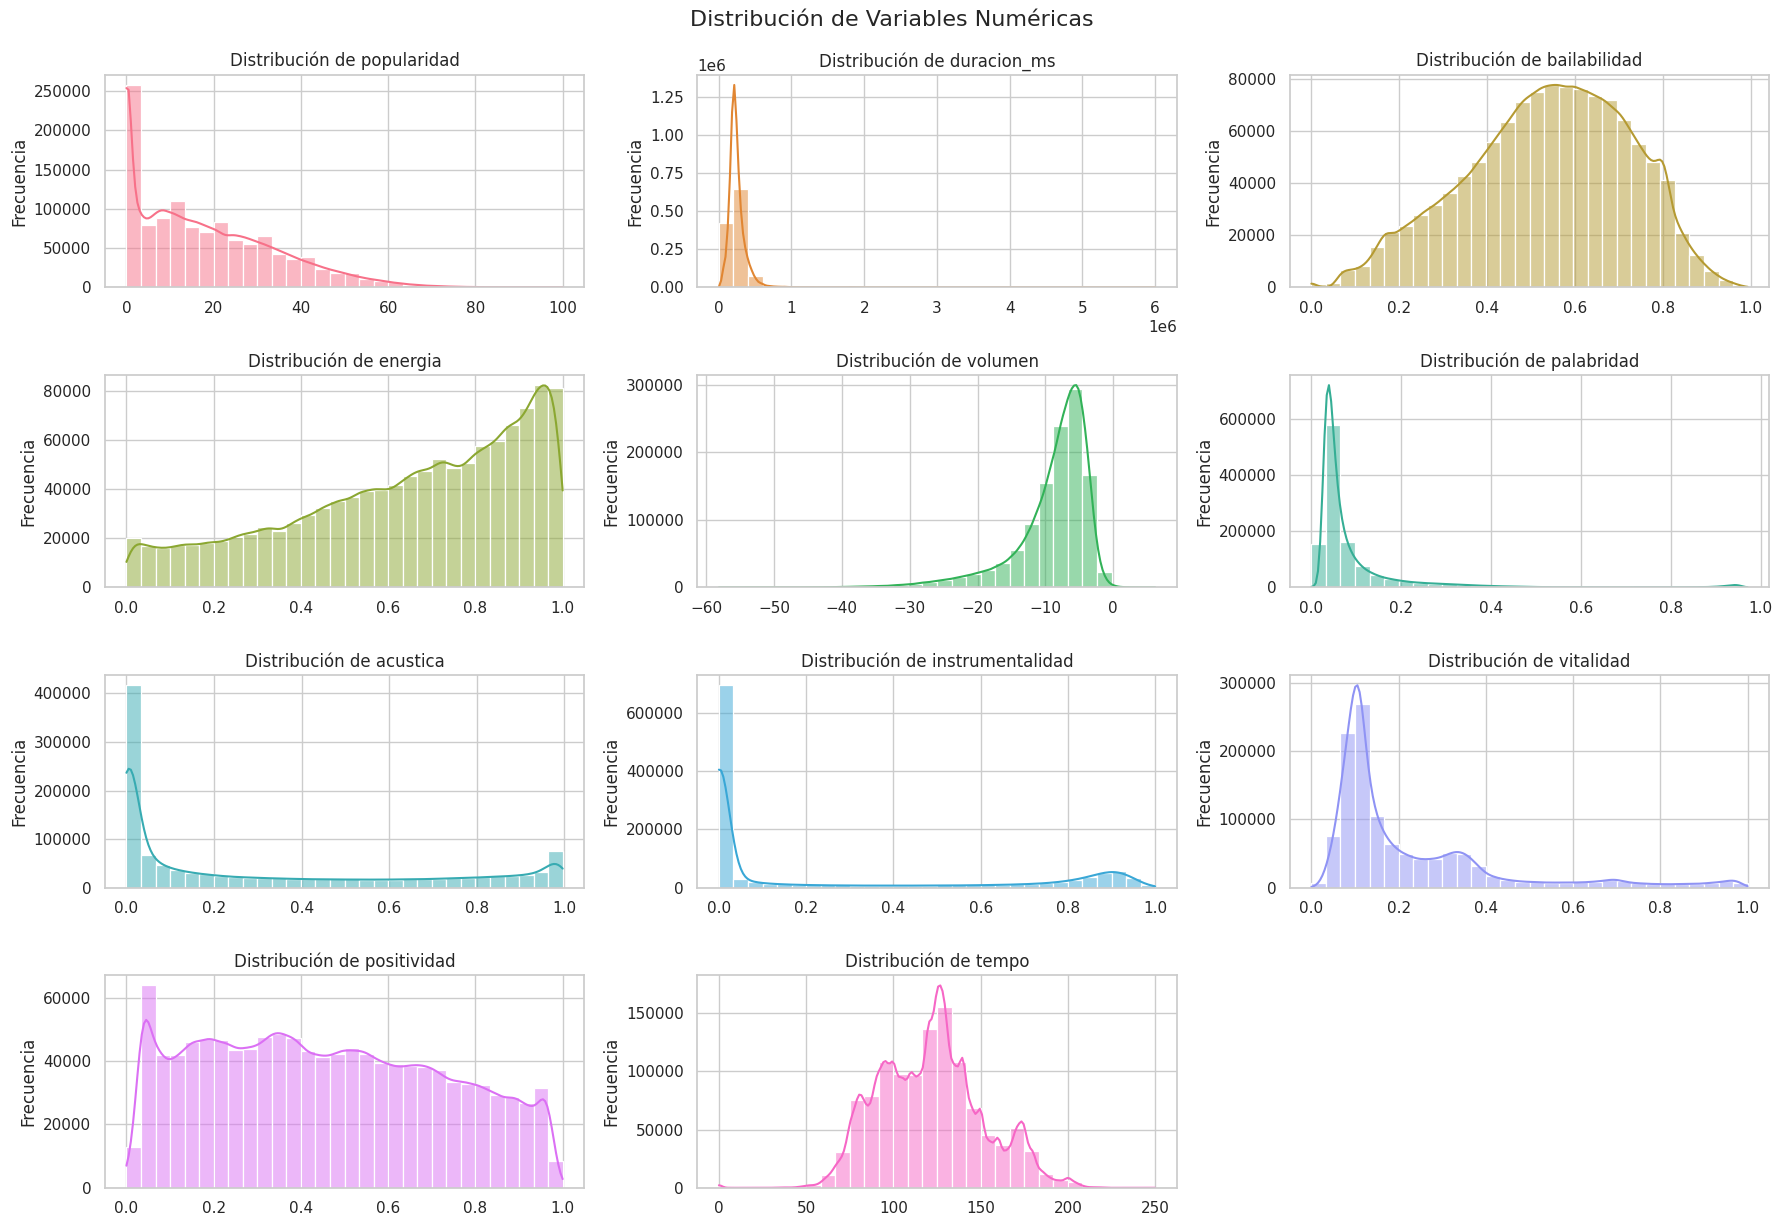

In [ ]:
# Lista de variables a graficar
vars_numericas = ['popularidad', 'duracion_ms', 'bailabilidad', 'energia', 'volumen',
                  'palabridad', 'acustica', 'instrumentalidad', 'vitalidad', 'positividad', 'tempo']

# Estilo general
sns.set(style='whitegrid')

# Tamaño de la gráfica
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.flatten()

# Selecciona una paleta de colores para las gráficas (11 colores)
colores = sns.color_palette("husl", len(vars_numericas))

# Dibujar cada histograma individual
for i, var in enumerate(vars_numericas):
    sns.histplot(datos[var], kde=True, bins=30, ax=axes[i], color=colores[i])
    axes[i].set_title(f'Distribución de {var}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Ocultar ejes extra (hay 12 espacios pero solo 11 gráficas)
for j in range(len(vars_numericas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribución de Variables Numéricas', fontsize=16, y=1.02)
plt.show()

**Descripción**: Esta celda identifica los 20 géneros musicales más comunes en el conjunto de datos y los visualiza mediante un gráfico de barras. Cada barra representa la cantidad de canciones de un género específico, con etiquetas numéricas encima.


/tmp/ipython-input-75-1031729954.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_generos, x='genero', y='count', palette='pastel')


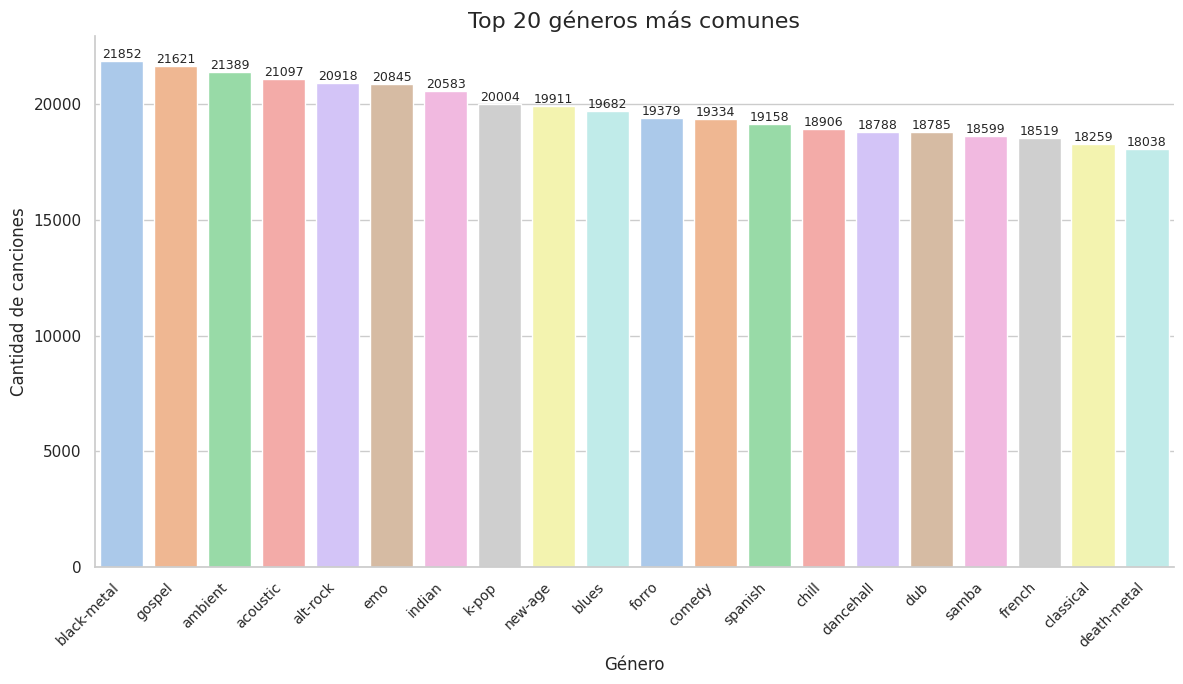

In [ ]:
# Obtiene los 20 géneros más frecuentes en la columna 'genero' del DataFrame 'datos'
top_generos = datos['genero'].value_counts().head(20).reset_index()
top_generos.columns = ['genero', 'count']

# Estilo
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Crea un gráfico de barras con los géneros y sus conteos
ax = sns.barplot(data=top_generos, x='genero', y='count', palette='pastel')

# Títulos y etiquetas
plt.title("Top 20 géneros más comunes", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Cantidad de canciones')
plt.xlabel('Género')

# Mostrar valores encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=9)

sns.despine()
plt.tight_layout()
plt.show()

**Descripción**: Esta celda analiza las variables categóricas del conjunto de datos para mostrar la frecuencia de cada valor único en ellas, con el objetivo de identificar posibles duplicados o inconsistencias. Además, calcula y muestra el número total de valores nulos presentes en todo el conjunto.

In [ ]:
# Para cada variable categórica buscar duplicados
for col in datos.select_dtypes(include=['object']).columns:
    print(f"Valores únicos en {col}:")
    print(datos[col].value_counts())
    print("\n")

# Verificar si hay valores nulos
valores_nulos = datos.isnull().sum().sum()
print(f"Número total de valores nulos: {valores_nulos}")

Valores únicos en nombre_artista:
nombre_artista
Traditional                       4058
Grateful Dead                     2320
Johann Sebastian Bach             2125
Giacomo Meyerbeer                 1345
Elvis Presley                     1242
                                  ... 
Micke MiMo Moberg                    1
Surviving The Charade                1
Little Majorette                     1
Sonic Station                        1
Ohlson har semester production       1
Name: count, Length: 64158, dtype: int64


Valores únicos en nombre_cancion:
nombre_cancion
Intro                              466
Home                               313
Forever                            229
Hold On                            224
Stay                               220
                                  ... 
Ultra Love                           1
Sweet Dream - Steve Brian Remix      1
Electric Pirates                     1
Is It Love - Matt Lange Remix        1
Hear It Now                          1
N

## **Limpieza y preparación de los datos**

**Descripción**: Esta celda identifica y extrae todas las filas con valores duplicados en la columna `track_id`. Primero, muestra los cinco IDs de pista que más se repiten y luego despliega todas las filas duplicadas ordenadas por el `track_id`.


In [ ]:
# Filtra todas las filas que tienen valores duplicados en la columna 'track_id'
duplicados_globales = datos[datos.duplicated(subset='id_cancion', keep=False)]

# Imprime los 5 'track_id' que más se repiten
print(duplicados_globales['id_cancion'].value_counts().head())

# Muestra todas las filas duplicadas basadas en 'track_id', ordenadas por esta columna
datos[datos['id_cancion'].duplicated(keep=False)].sort_values('id_cancion')


Series([], Name: count, dtype: int64)


,indice,nombre_artista,nombre_cancion,id_cancion,popularidad,año,genero,bailabilidad,energia,tonalidad,volumen,modo,palabridad,acustica,instrumentalidad,vitalidad,positividad,tempo,duracion_ms,compas


**Descripción**: Esta celda realiza una limpieza del conjunto de datos. Se crea una copia de los datos originales, luego, se eliminan los registros duplicados basados en `track_id`, conservando solo la primera aparición. También se eliminan todas las filas que contienen valores nulos. Finalmente, se imprimen las dimensiones del conjunto.


In [ ]:
# Copia de los datos originales para limpieza
datos_limpios = datos.copy()

# Eliminar duplicados por track_id, solo toma la primera ocurrencia
datos_limpios = datos_limpios.drop_duplicates(subset='id_cancion', keep='first')

# Eliminar filas con valores nulos
datos_limpios = datos_limpios.dropna()

# Dimensiones del conjunto de datos después de la limpieza
print(f"Dimensiones del conjunto de datos después de la limpieza: {datos_limpios.shape}")

Dimensiones del conjunto de datos después de la limpieza: (1159748, 20)


## **Agrupamiento**

**Descripción**: Esta celda selecciona un subconjunto de columnas del conjunto limpio, correspondiente a características musicales relevantes como popularidad, duración, tonalidad, energía, etc. Se almacena en un nuevo DataFrame (`datos_caracteristicas`).


In [ ]:
# Se define una lista con las características musicales que se desean analizar
caracteristicas = ['popularidad', 'duracion_ms', 'año', 'bailabilidad', 'energia','tonalidad', 'volumen', 'modo', 'palabridad', 'acustica',
    'instrumentalidad', 'vitalidad', 'positividad', 'tempo', 'compas']

# Crea una copia del subconjunto limpio que contiene solo las columnas seleccionadas
datos_caracteristicas = datos_limpios[caracteristicas].copy()

**Descripción**: Esta celda aplica una transformación (media = 0, desviación estándar = 1) a las características musicales seleccionadas. Luego, se utiliza el análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos a dos componentes principales (`PC1` y `PC2`). Finalmente, se visualizan los datos proyectados en un gráfico de dispersión.

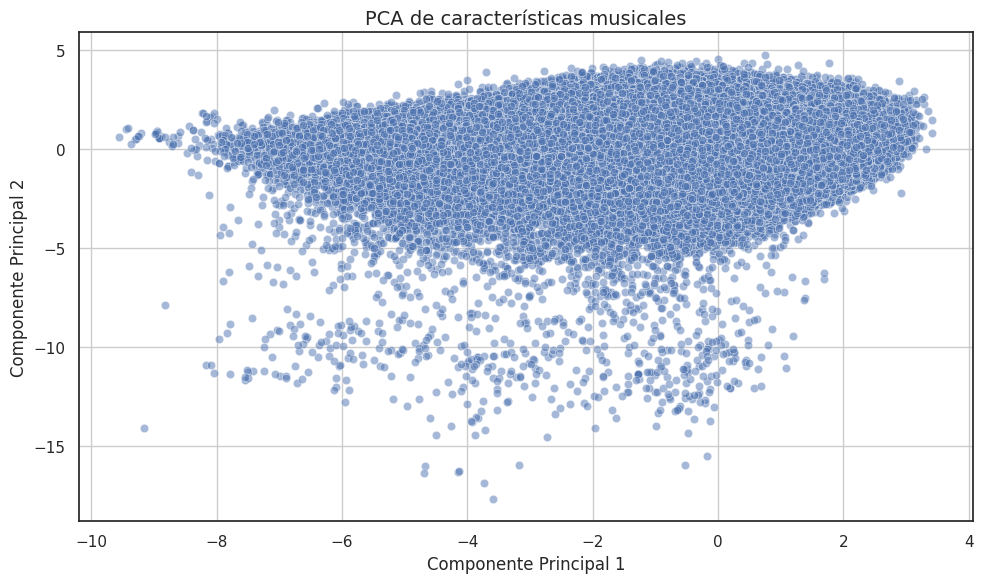

In [ ]:
# Estandarizado de las características musicales
# Transforma los datos para que tengan media 0 y desviación estándar 1
escalador = StandardScaler()
datos_caracteristicas[caracteristicas] = escalador.fit_transform(datos_caracteristicas)

# Aplicación de PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datos_caracteristicas)

# Crear un nuevo DataFrame con las dos componentes principales resultantes
df_pca = pd.DataFrame(datos_pca, columns=['PC1', 'PC2'])

# Visualización de los datos transformados por PCA en un scatter plot
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.5)
plt.title("PCA de características musicales", fontsize=14)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada (suma):", pca.explained_variance_ratio_.sum())

Varianza explicada por cada componente: [0.19989512 0.10309317]
Varianza total explicada (suma): 0.3029882945519989


**Descripción**: Esta celda implementa el Método del Codo para determinar el número óptimo de clusters (`k`) al aplicar K-Means sobre los datos transformados por PCA. Para cada valor de `k` (del 1 al 11), se calcula la inercia (es decir, la suma de las distancias cuadradas dentro de los clusters). Luego, se grafica la inercia en función de `k`.

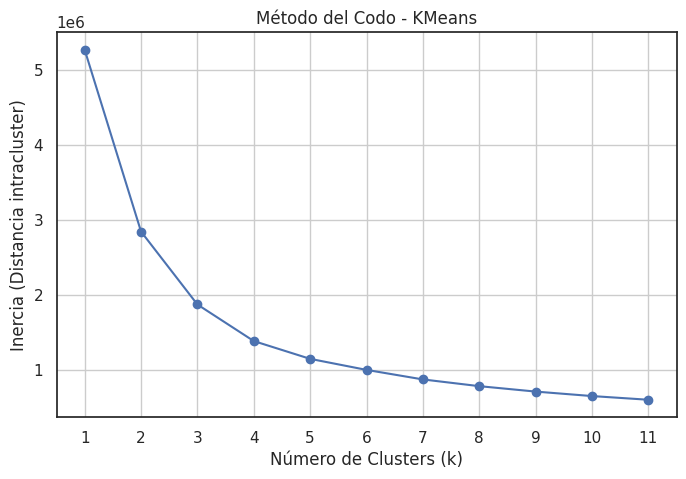

In [ ]:
# Define un rango de valores posibles para el número de clusters (k)
k_rango = range(1, 12)

# Lista para almacenar la inercia (suma de distancias intra-cluster) para cada valor de k
inercias = []

# Itera sobre cada valor de k y entrena un modelo KMeans
for k in k_rango:
    kmeans = KMeans(n_clusters=k, random_state=21, n_init=10)
    kmeans.fit(datos_pca)
    inercias.append(kmeans.inertia_)  # Guarda la inercia para ese k

# Grafica el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_rango, inercias, marker='o')
plt.title('Método del Codo - KMeans')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Distancia intracluster)')
plt.xticks(k_rango)
plt.grid(True)
plt.show()

**Descripción**: Esta celda entrena el modelo final de K-Means con `k=4`, basándose en los datos transformados por PCA. Luego, asigna a cada observación un número de cluster (del 0 al 3) y agrega esta información como una nueva columna (`cluster`) en el DataFrame `datos_caracteristicas`.

In [ ]:
# Entrena el modelo KMeans con k=4 clusters, usando una semilla fija (21)
kmeans_final = KMeans(n_clusters=4, random_state=21, n_init=10)

# Ajusta el modelo a los datos reducidos por PCA y obtiene el cluster asignado para cada observación
clusters = kmeans_final.fit_predict(datos_pca)

# Guardar una copia antes de modificar con cluster
datos_caracteristicas_escaladas = datos_caracteristicas.copy()

# Añade una nueva columna al DataFrame con las características, indicando el cluster al que pertenece cada fila
datos_caracteristicas['cluster'] = clusters

**Descripción**: Esta celda visualiza los resultados del clustering de K-Means sobre el espacio reducido por PCA. Cada punto representa una observación en las dos primeras componentes principales, coloreada según el cluster al que pertenece. Además, se añaden los centroides de los clusters como marcadores negros en forma de "X".

/tmp/ipython-input-84-701899203.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


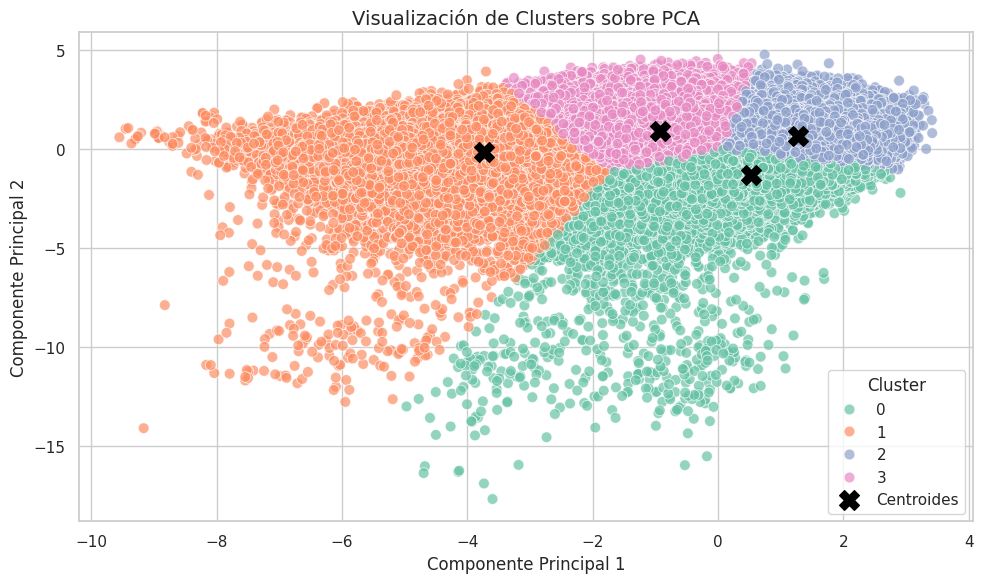

In [ ]:
# Crea un DataFrame con las dos componentes principales del PCA
df_pca = pd.DataFrame(datos_pca, columns=['PC1', 'PC2'])

# Agrega al DataFrame una columna con la asignación de clusters
df_pca['cluster'] = clusters

# Configura el estilo de los gráficos con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Muestra los puntos del scatter plot, coloreados según el cluster al que pertenecen
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set2', alpha=0.7, s=60)

# Extrae los centroides calculados por el modelo KMeans en el espacio PCA
centroides_pca = kmeans_final.cluster_centers_

# Añade los centroides al gráfico como marcadores grandes en forma de "X"
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], s=200, c='black', marker='X', label='Centroides')

# Configuración estética del gráfico
plt.legend(title="Cluster")
plt.title("Visualización de Clusters sobre PCA", fontsize=14)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Quitar columnas agregadas
columnas_originales = caracteristicas.copy()

# Inversión del escalado para recuperar la escala original de las características
datos_originales = pd.DataFrame(escalador.inverse_transform(datos_caracteristicas_escaladas[columnas_originales]), columns=columnas_originales)

# Clusters asignados
datos_originales['cluster'] = datos_caracteristicas['cluster'].values

# Agrupar el DataFrame original con características por cluster
perfil_clusters = datos_originales.groupby('cluster').mean().round(2)

# Mostrar el perfil medio de cada cluster
perfil_clusters

,popularidad,duracion_ms,año,bailabilidad,energia,tonalidad,volumen,modo,palabridad,acustica,instrumentalidad,vitalidad,positividad,tempo,compas
cluster,,,,,,,,,,,,,,,
0,12.76,301891.62,2010.99,0.47,0.81,5.49,-6.85,0.57,0.08,0.06,0.41,0.25,0.32,133.35,3.92
1,15.11,263076.57,2011.45,0.33,0.17,4.94,-20.42,0.66,0.05,0.88,0.66,0.16,0.18,103.39,3.58
2,24.00,218595.91,2012.88,0.65,0.77,5.36,-6.06,0.64,0.11,0.18,0.05,0.23,0.65,122.70,3.99
3,18.77,218558.57,2012.06,0.56,0.42,5.05,-10.96,0.71,0.11,0.64,0.15,0.21,0.46,111.20,3.83


In [ ]:
# Unir cluster con género
datos_limpios_cluster = datos_caracteristicas.copy()
datos_limpios_cluster['genero'] = datos_limpios['genero'].values

# Ver los 5 generos mas frecuentes en cada cluster
generos_cluster = datos_limpios_cluster.groupby('cluster')['genero'].value_counts().groupby(level=0).head(5)
generos_cluster

cluster  genero        
0        black-metal       19995
         death-metal       16446
         grindcore         13682
         heavy-metal       12917
         minimal-techno    12837
1        sleep             16034
         ambient           15972
         new-age           15861
         classical         14155
         opera             10170
2        forro             17239
         dancehall         16698
         dance             14350
         salsa             13815
         hip-hop           13757
3        comedy            13417
         tango             12527
         acoustic          11573
         cantopop           8801
         folk               8789
Name: count, dtype: int64

## **Clasificación**

**Descripción**: Esta celda implementa un modelo de clasificación de géneros musicales usando un Bosque Aleatorio (`RandomForestClassifier`). Se toma una muestra del 10% del conjunto limpio, se escalan las variables numéricas y se aplican técnicas de balanceo (`RandomUnderSampler`) para corregir el desbalance de clases. Luego, se divide el conjunto en entrenamiento y prueba, se entrena el modelo y se evalúa mediante métricas como `accuracy` y el `classification_report`.

In [ ]:
# Toma una muestra aleatoria del 10% del conjunto limpio para reducir la complejidad
datos_muestra = datos_limpios.sample(frac=0.1, random_state=21)

# Separa las características y la variable objetivo
X = datos_muestra[caracteristicas]
y = datos_muestra['genero']

# Escala las características numéricas
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

# Aplica submuestreo aleatorio para balancear clases (reduce las clases mayoritarias)
rus = RandomUnderSampler(random_state=21)
X_remuestrado, y_remuestrado = rus.fit_resample(X_escalado, y)

# Divide los datos balanceados en entrenamiento (80%) y prueba (20%)
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X_remuestrado, y_remuestrado, test_size=0.2, random_state=21)

# Instancia un clasificador Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)

# Entrena el modelo con los datos de entrenamiento
rf_model.fit(X_entrena, y_entrena)

# Realiza predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_prueba)

# Evalúa el modelo con métricas de precisión y clasificación por clase
print("Accuracy del modelo Bosque Aleatorio:", accuracy_score(y_prueba, y_pred))
print("Reporte de clasificación:\n", classification_report(y_prueba, y_pred))


Accuracy del modelo Bosque Aleatorio: 0.24671669793621012
Reporte de clasificación:
                    precision    recall  f1-score   support

         acoustic       0.00      0.00      0.00        15
         afrobeat       0.21      0.23      0.22        13
         alt-rock       0.14      0.15      0.15        13
          ambient       0.17      0.15      0.16        13
      black-metal       0.24      0.44      0.31         9
            blues       0.00      0.00      0.00        10
        breakbeat       0.26      0.45      0.33        11
         cantopop       0.16      0.20      0.18        15
    chicago-house       0.45      0.64      0.53        14
            chill       0.27      0.27      0.27        15
        classical       0.40      0.55      0.46        11
             club       0.20      0.08      0.12        12
           comedy       0.44      0.88      0.58         8
          country       0.04      0.12      0.06         8
            dance       0.05 

**Descripción**: Este diccionario define un mapeo de géneros específicos a macrogéneros. Su propósito es simplificar la clasificación de géneros musicales agrupando términos similares o relacionados bajo una misma categoría general.

In [ ]:
# Diccionario que agrupa géneros musicales específicos en macrogéneros.
mapeo_macrogeneros = {
    'alt-rock': 'rock', 'hard-rock': 'rock', 'psych-rock': 'rock', 'punk': 'rock', 'punk-rock': 'rock', 'rock': 'rock', 'rock-n-roll': 'rock', 'indie-pop': 'rock',
    'pop': 'pop', 'power-pop': 'pop', 'pop-film': 'pop', 'k-pop': 'pop', 'cantopop': 'pop', 'dance': 'pop', 'party': 'pop', 'songwriter': 'pop', 'romance': 'pop',
    'edm': 'electronica', 'house': 'electronica', 'deep-house': 'electronica', 'techno': 'electronica', 'trance': 'electronica', 'electro': 'electronica', 'minimal-techno': 'electronica', 'progressive-house': 'electronica', 'detroit-techno': 'electronica', 'chicago-house': 'electronica', 'club': 'electronica', 'electronic': 'electronica', 'dubstep': 'electronica', 'drum-and-bass': 'electronica', 'breakbeat': 'electronica', 'garage': 'electronica',
    'hip-hop': 'urbano', 'dancehall': 'urbano', 'afrobeat': 'urbano', 'funk': 'urbano', 'soul': 'urbano', 'gospel': 'urbano',
    'metal': 'metal', 'black-metal': 'metal', 'death-metal': 'metal', 'grindcore': 'metal', 'heavy-metal': 'metal', 'metalcore': 'metal', 'industrial': 'metal', 'goth': 'metal',
    'jazz': 'jazz_blues', 'blues': 'jazz_blues',
    'classical': 'clasica', 'opera': 'clasica', 'piano': 'clasica', 'new-age': 'clasica', 'ambient': 'clasica',
    'folk': 'folk_country', 'country': 'folk_country', 'acoustic': 'folk_country', 'singer-songwriter': 'folk_country', 'forro': 'folk_country', 'sertanejo': 'folk_country', 'samba': 'folk_country', 'tango': 'folk_country',
    'salsa': 'latino', 'spanish': 'latino',
    'comedy': 'otros', 'chill': 'otros', 'emo': 'otros', 'experimental': 'otros', 'groove': 'otros', 'show-tunes': 'otros', 'sleep': 'otros'
}

**Descripción**: Esta celda entrena un modelo de clasificación para predecir **macrogéneros musicales**. Se utiliza una muestra del 20% del conjunto de datos limpio y se agrupan los géneros originales en macrogéneros mediante un mapeo. Luego, se normalizan las variables numéricas, y el conjunto de entrenamiento se balancea usando **SMOTE**, una técnica de oversampling sintético para abordar el desbalance de clases. El modelo entrenado es un **Random Forest** y su rendimiento se evalúa mediante `accuracy` y un `classification_report`.

Accuracy: 0.4780987281741755
Reporte de clasificación:
               precision    recall  f1-score   support

     clasica       0.57      0.74      0.64      3525
 electronica       0.64      0.63      0.63      6866
folk_country       0.48      0.56      0.51      5587
  jazz_blues       0.20      0.36      0.26      1426
      latino       0.33      0.37      0.35      1454
       metal       0.58      0.73      0.65      4610
        otro       0.49      0.19      0.28      7178
       otros       0.64      0.35      0.45      4088
         pop       0.39      0.41      0.40      4395
        rock       0.31      0.36      0.33      3608
      urbano       0.38      0.49      0.43      3653

    accuracy                           0.48     46390
   macro avg       0.46      0.47      0.45     46390
weighted avg       0.49      0.48      0.47     46390



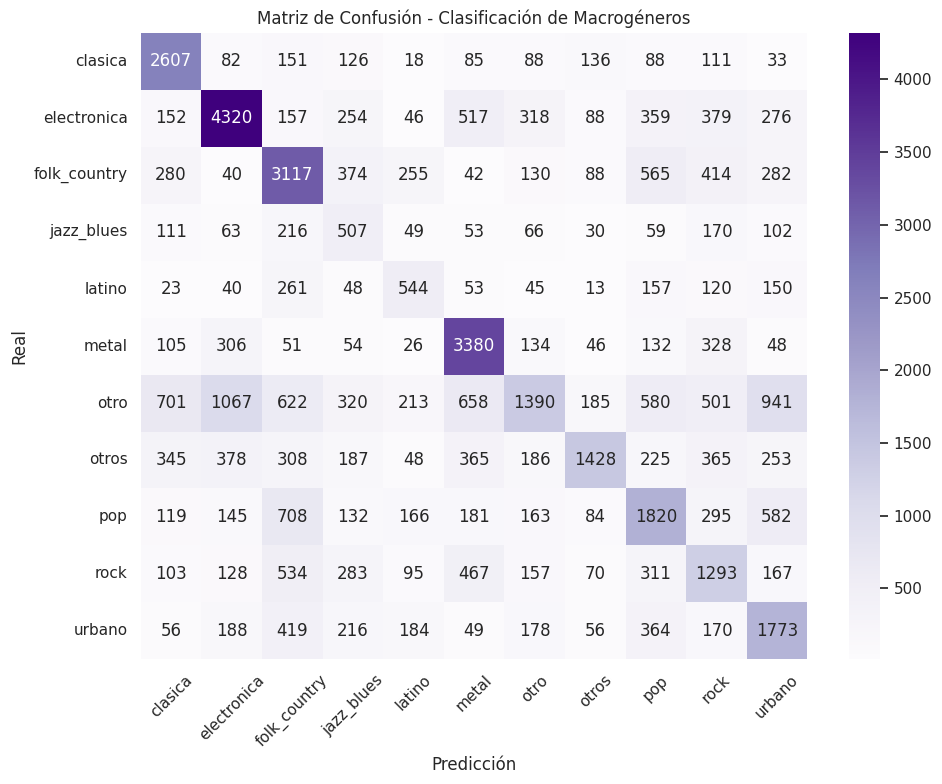

In [ ]:
# Toma una muestra aleatoria del 20% del conjunto
datos_muestra = datos_limpios.sample(frac=0.2, random_state=21)

# Crea una nueva columna 'macro_genero' mapeando los géneros originales al diccionario de macrogéneros
# Los géneros no incluidos en el mapeo se asignan a 'otro'
datos_muestra['macro_genero'] = datos_muestra['genero'].map(mapeo_macrogeneros).fillna('otro')

# Define las variables predictoras y la variable objetivo (macrogénero)
X = datos_muestra[caracteristicas]
y = datos_muestra['macro_genero']

# Escala las características numéricas para normalizar el rango de valores
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

# Divide el conjunto en entrenamiento y prueba (estratificado por clase)
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X_escalado, y, test_size=0.2, random_state=21, stratify=y)

# Aplica SMOTE para balancear las clases del conjunto de entrenamiento mediante oversampling sintético
smote = SMOTE(random_state=21)
X_entrena_resampled, y_entrena_resampled = smote.fit_resample(X_entrena, y_entrena)

# Entrena un modelo Random Forest con los datos balanceados
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_entrena_resampled, y_entrena_resampled)

# Predice y evalúa con el conjunto de prueba
y_pred = clf.predict(X_prueba)
print("Accuracy:", accuracy_score(y_prueba, y_pred))
print("Reporte de clasificación:\n", classification_report(y_prueba, y_pred))

# Obtener etiquetas únicas en orden consistente
etiquetas = sorted(y.unique())

# Calcular matriz
matriz_confusion = confusion_matrix(y_prueba, y_pred, labels=etiquetas)

# Graficar matriz
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Purples', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Clasificación de Macrogéneros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Regresión**

**Descripción**: Esta celda implementa un modelo de regresión para predecir la variable `popularidad`, utiliza como entrada un subconjunto del 5% de los datos limpios. Se excluye la popularidad como variable predictora. Se utiliza un **Regressor Random Forest** y posteriormente se entrena y evalúa el modelo con métricas como MAE, RMSE y R².

In [ ]:
# Tomar una muestra aleatoria del 10% del conjunto limpio
datos_muestra = datos_limpios.sample(frac=0.05, random_state=21)

# Seleccionar características numéricas
X = datos_muestra[caracteristicas].copy()

# Eliminar la variable 'popularidad' si está incluida en las características predictoras
if 'popularidad' in X.columns:
    X = X.drop(columns=['popularidad'])

# Escalar los datos para normalizar su rango
#escalador = StandardScaler()
#X_escalado = escalador.fit_transform(X)

# Variable objetivo: popularidad de la canción
y = datos_muestra['popularidad']

reg_rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=21)

# División del conjunto en entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
reg_rf.fit(X_entrena, y_entrena)

# Predicción en el conjunto de prueba y evaluación de métricas
y_pred = reg_rf.predict(X_prueba)
# Error absoluto medio
print("MAE:", mean_absolute_error(y_prueba, y_pred))
# Raíz del error cuadrático medio
print("RMSE:", np.sqrt(mean_squared_error(y_prueba, y_pred)))
# Coeficiente de determinación
print("R²:", r2_score(y_prueba, y_pred))

MAE: 10.699251689099853
RMSE: 13.415627813210508
R²: 0.26975614717470764


/tmp/ipython-input-91-72606562.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='pastel')


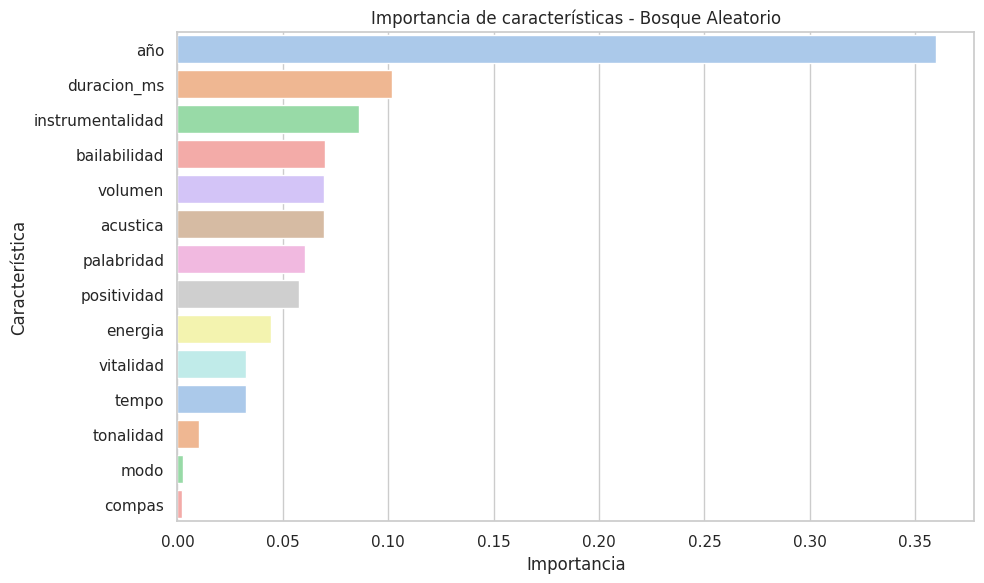

In [ ]:
importancia = reg_rf.feature_importances_
caracteristicas_filtradas = X.columns  # Ya sin 'popularidad'

importancia_df = pd.DataFrame({
    'Característica': caracteristicas_filtradas,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df, x='Importancia', y='Característica', palette='pastel')
plt.title("Importancia de características - Bosque Aleatorio")
plt.tight_layout()
plt.show()

## **Etiquetado Popularidad**

**Descripción**: Esta celda crea una nueva variable categórica llamada `popularidad_clase` basada en la variable numérica `popularidad`. La función `categorizar_popularidad` asigna etiquetas 'baja', 'media' y 'alta' según rangos definidos de popularidad. Además, se eliminan las canciones con popularidad cero para evitar categorías sin información significativa. Finalmente, se imprime la distribución de las nuevas clases para tener un panorama del balance de categorías.

In [ ]:
# Función para clasificar la popularidad en tres categorías: baja, media y alta
def categorizar_popularidad(valor):
    if valor < 25:
        return 'baja'
    elif valor <= 60:
        return 'media'
    else:
        return 'alta'

# Eliminar canciones con popularidad 0, ya que no aportan información útil para clasificación
datos_limpios = datos_limpios[datos_limpios['popularidad'] > 0]

# Crear una nueva columna con la categoría de popularidad aplicando la función definida
datos_limpios['popularidad_clase'] = datos_limpios['popularidad'].apply(categorizar_popularidad)

# Mostrar la distribución de las clases para entender cuántas canciones hay en cada categoría
print(datos_limpios['popularidad_clase'].value_counts())

popularidad_clase
baja     628391
media    359072
alta      13894
Name: count, dtype: int64


**Descripción**:  
Esta celda realiza una clasificación de la popularidad en tres clases ('baja', 'media', 'alta') usando un modelo Bosque Aleatorio. Primero se toma una submuestra balanceada por clase, se eliminan variables redundantes, se escalan las características y se divide el conjunto en entrenamiento y prueba. Se aplica SMOTE solo al conjunto de entrenamiento para balancear las clases y se entrena el modelo. Finalmente, se evalúa el desempeño del modelo con métricas de precisión, balanced accuracy, F1 macro y reporte de clasificación.

/tmp/ipython-input-93-2714248862.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  datos_muestra = datos_limpios.groupby('popularidad_clase').apply(lambda x: x.sample(n=10000, random_state=21)).reset_index(drop=True)


Accuracy: 0.5713333333333334
Balanced Accuracy: 0.5714392487939582
F1 Macro: 0.559002439793617
Reporte de clasificación:
               precision    recall  f1-score   support

        alta       0.62      0.71      0.66      2002
        baja       0.60      0.68      0.63      1996
       media       0.46      0.33      0.39      2002

    accuracy                           0.57      6000
   macro avg       0.56      0.57      0.56      6000
weighted avg       0.56      0.57      0.56      6000



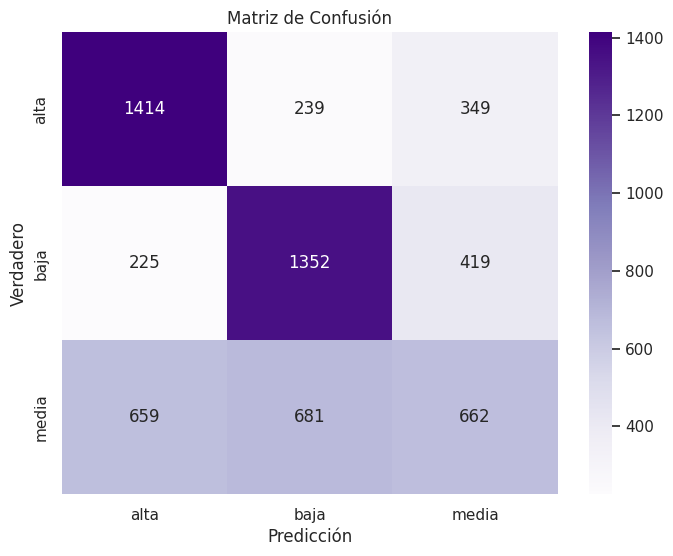

In [ ]:
# Submuestreo estratificado para balancear la cantidad de ejemplos por clase popularidad_clase
datos_muestra = datos_limpios.groupby('popularidad_clase').apply(lambda x: x.sample(n=10000, random_state=21)).reset_index(drop=True)

# Variables predictoras (excluyendo 'popularity') y variable objetivo
X = datos_muestra[caracteristicas].copy()
if 'popularidad' in X.columns:
    X = X.drop(columns=['popularidad'])
y = datos_muestra['popularidad_clase']

# Escalar características para normalizar la escala de los datos
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

# División en conjunto de entrenamiento y prueba (80%-20%)
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X_escalado, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear las clases solo en el conjunto de entrenamiento
smote = SMOTE(random_state=21)
X_entrena_resampled, y_entrena_resampled = smote.fit_resample(X_entrena, y_entrena)

# Entrenar el clasificador Bosque Aleatorio con los datos balanceados
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_entrena_resampled, y_entrena_resampled)

# Predicción y evaluación con el conjunto de prueba original (sin balancear)
y_pred = clf.predict(X_prueba)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_prueba, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_prueba, y_pred))
print("F1 Macro:", f1_score(y_prueba, y_pred, average='macro'))
print("Reporte de clasificación:\n", classification_report(y_prueba, y_pred))

etiquetas = sorted(y.unique())

# Matríz de Confusión
conf_matrix = confusion_matrix(y_prueba, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=etiquetas , yticklabels= etiquetas)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()